## Install/import libraries

In [1]:
#%pip install seaborn
#%pip install scipy
#%pip install statsmodels==0.10.2


In [3]:
import pandas as pd 
import pandas.util.testing as tm
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

## Boston Housing

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

Dataset values
<!--
·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's -->


In [5]:
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


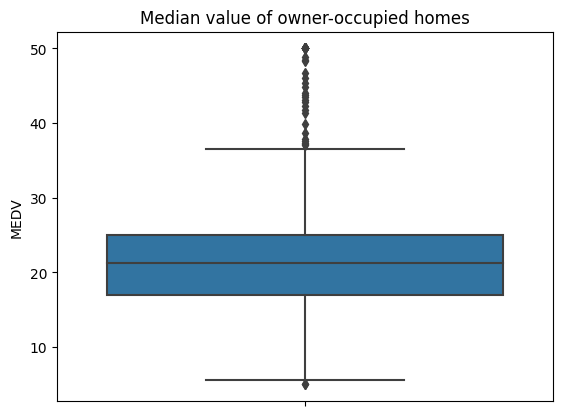

In [14]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.title("Median value of owner-occupied homes")
plt.show()

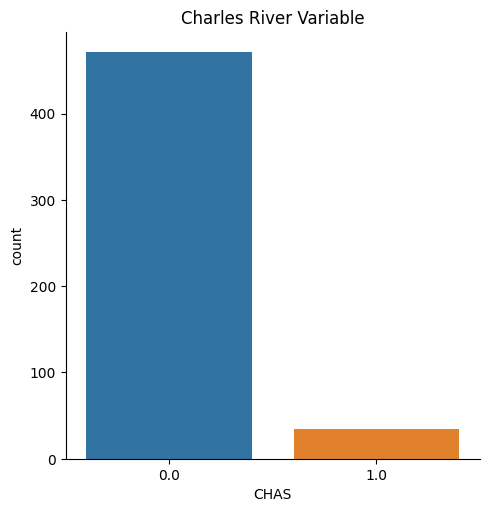

In [12]:
ax = sns.catplot(x='CHAS',kind='count',data=boston_df)
plt.title('Charles River Variable')
plt.show()

Text(0.5, 1.0, 'Median value of homes by Age Group')

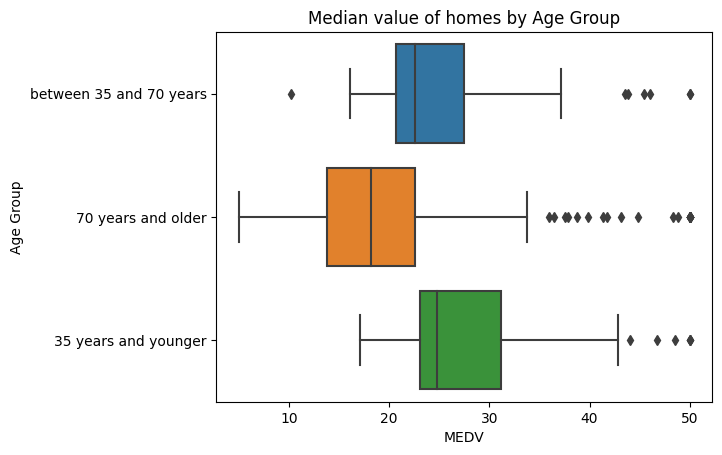

In [16]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <70), 'Age Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age Group'] = '70 years and older'

ax3 = sns.boxplot(x='MEDV',y='Age Group', data=boston_df)
ax3.set_title('Median value of homes by Age Group')

Text(0.5, 1.0, 'Relation between Nitric Oxide Concentration and Proportion of Non-Retail Business Acres')

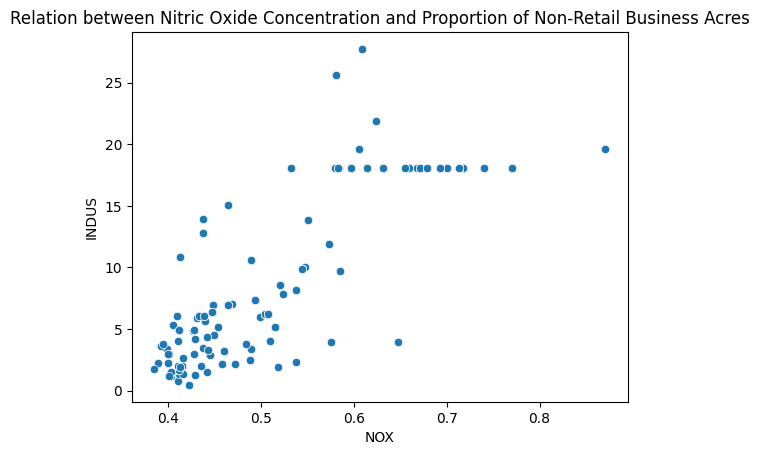

In [19]:
ax4 = sns.scatterplot(x='NOX', y='INDUS',data=boston_df)
ax4.set_title('Relation between Nitric Oxide Concentration and Proportion of Non-Retail Business Acres')

The scatterplot above shows a positive correlation between Nitric Oxide Concentration and the Proportion of Non-Retail Business Acres per town.

Text(0.5, 1.0, 'Pupil to Teacher Ratio per Town')

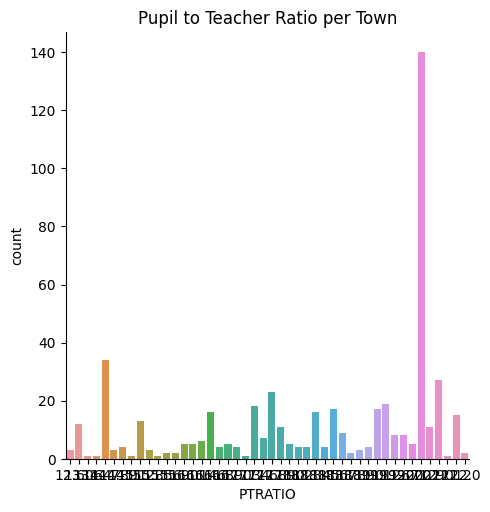

In [26]:
ax5 = sns.catplot(x='PTRATIO',kind='count', data=boston_df)
plt.title('Pupil to Teacher Ratio per Town')

## Statistic Tests

### Is there a significant difference in mediian value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis: \
Null > There is no significant difference in median value between houses bounded and not bounded by the Charles River.\
Alternative > There is a significant difference in median value between houses bounded and not bounded by the Charles River.

In [39]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],
                      boston_df[boston_df['CHAS']==0]['MEDV'], equal_var=True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Because the p-value is less than .05, we reject the Null hypothesis, meaning there is a significatn difference in median value between houses bounded and not bounded by the Charles river. 

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis 

Null Hypothesis: There is not a statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940. \

Alternative Hypothesis: There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940.

In [41]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table=sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Because the p-value is less than 0.5, we reject the null hypothesis, stating that there is a statisitical difference in median value of houses and proportion of owner occupied units built prior to 1940.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypothesis: Nitric Oxide concentrations is not correlated to the proportion of non-retail business acres per town. \
Alternative Hypothesis: Nitric Oxide concentrations are correlated to the proportion of non-retail business acres per town.

In [42]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209157, 7.913361061233745e-98)

Because the p-value is less than 0.5, and the Pearson coefficient is positive, we reject the null hypothesis, and state that there is a positive correlation between nitric oxide and the proportion of non-retail business acres per town.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [43]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
prediction = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        17:33:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of DIS (1.0916) indicates that the increase in distance has a positive correlation to median house values. When distance increases by 1, median house value increases by 1.0916